In [66]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import spacy

# Sentences into dataframe

In [2]:
# path = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), 'data', 'en-de'))
path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'en-de')

In [3]:
data = [f for f in glob.glob(path + "**/*", recursive=True)]

In [4]:
names=['val src', 'train score', 
       'val score', 'val tra', 
       'train tra', 'test tra', 
       'test src', 'train src']

In [5]:
data_frames = [pd.read_table(data[i], names=[names[i]], sep='delimiter', engine='python') for i in range(len(data))]

In [6]:
train = pd.concat((data_frames[7], data_frames[4], data_frames[1]), axis=1)
validation = pd.concat((data_frames[0], data_frames[3], data_frames[2]), axis=1)
test = pd.concat((data_frames[6], data_frames[5]), axis=1)

# Data Pre-processing

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/theophile/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

In [9]:
train['len']=np.nan
train['stop words']=np.nan

In [10]:
for idx, sentence in enumerate (train['train src']):
    sentence_without_stop = 0
    
    for token in sentence.split(" "):
        if token not in stopWords:
            sentence_without_stop += 1
            
    train.at[idx, 'src len'] = len(sentence.split(' '))
    train.at[idx, 'src stop words']=sentence_without_stop

In [11]:
for idx, sentence in enumerate (train['train tra']):            
    train.at[idx, 'tra len'] = len(sentence.split(' '))

In [12]:
train['len diff']=train['tra len']-train['src len']

Correlation between sentence length and score: -0.048007012094723675


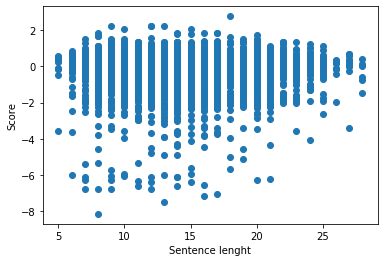

In [13]:
plt.scatter(train[:]['src len'], train[:]['train score'])
plt.xlabel('Sentence lenght')
plt.ylabel('Score')
corr = train['train score'].corr(train['src len'])
print('Correlation between sentence length and score:', corr)

Correlation between sentence length and score: -0.051364251313054866


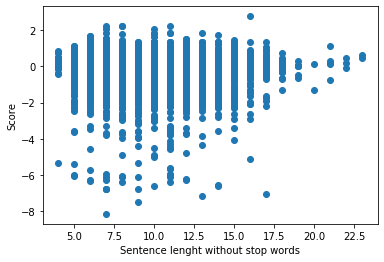

In [15]:
plt.scatter(train[:]['src stop words'], train[:]['train score'])
plt.xlabel('Sentence lenght without stop words')
plt.ylabel('Score')
corr = train['train score'].corr(train['src stop words'])
print('Correlation between sentence length and score:', corr)

Correlation between sentence length and score: 0.004299844129647504


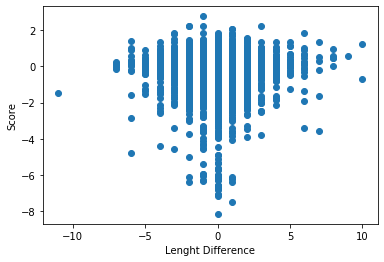

In [16]:
plt.scatter(train[:]['len diff'], train[:]['train score'])
plt.xlabel('Lenght Difference')
plt.ylabel('Score')
corr = train['train score'].corr(train['len diff'])
print('Correlation between sentence length and score:', corr)

# Stemming and Lemmatizing

In [65]:
## If not using spacy's lemmatizing...
from nltk.stem.cistem import Cistem #stem for german
stemmer = Cistem()
from nltk.stem import WordNetLemmatizer #lemma for english
lemma = WordNetLemmatizer()
from nltk.stem import PorterStemmer #stem for english
porter = PorterStemmer()

In [64]:
s1 = "Speicherbehältern"
stemmer.segment(s1)[0]
lemma.lemmatize('Speicherbehältern')
for idx, sentence in enumerate (train['train src']):
    tokenized_sentence = ''
    for token in sentence.split(' '):
        token = porter.stem(token)
        tokenized_sentence += (' ' + token)
    train.at[idx,'englsih stem']=tokenized_sentence
for idx, sentence in enumerate (train['train tra']):
    tokenized_sentence = ''
    for token in sentence.split(' '):
        token = stemmer.segment(token)[0]
        tokenized_sentence += (' ' + token)
    train.at[idx,'german stem']=tokenized_sentence

'Speicherbehältern'

In [23]:
## With Spacy
import spacy
nlp_en = spacy.load("en_core_web_sm")
nlp_ge = spacy.load("de_core_news_sm")

In [24]:
sentence_sp = nlp_en(train.iloc[0]['train src'])

In [25]:
def lemmatizer_en(sentence):
    sentence = nlp_en(sentence)
    tokenized_sentence = ''
    for token in sentence:
        token = token.lemma_
        tokenized_sentence += (' ' + token)
    return tokenized_sentence

In [26]:
train['lem src']=train['train src'].apply(lemmatizer_en)

In [124]:
def lemmatizer_ge(sentence):
    sentence = nlp_ge(sentence)
    tokenized_sentence = ''
    for token in sentence:
        token = token.lemma_
        tokenized_sentence += (' ' + token)
    return tokenized_sentence

In [125]:
train['lem tra']=train['train tra'].apply(lemmatizer_ge)

In [126]:
train.head()

,train src,train tra,train score,len,stop words,src len,src stop words,tra len,len diff,sentiment english,sentiment german,lem src,lem tra
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,1.101697,NaN,NaN,10.0,7.0,9.0,-1.0,NaN,NaN,José Ortega y Gasset visit Husserl at Freibur...,1934 besuchen José Ortega y Gasset Husserl in...
1,"However, a disappointing ninth in China meant ...",Eine enttäuschende Neunte in China bedeutete j...,-0.516656,NaN,NaN,16.0,9.0,17.0,1.0,NaN,NaN,"however , a disappointing ninth in China mean...",Eine enttäuschend Neunte in China bedeuten je...
2,"In his diary, Chase wrote that the release of ...","In seinem Tagebuch, Chase schrieb, dass die Ve...",-2.226388,NaN,NaN,19.0,12.0,19.0,0.0,NaN,NaN,"in -PRON- diary , Chase write that the releas...","In mein Tagebuch , Chase schreiben , dass der..."
3,Heavy arquebuses mounted on wagons were called...,Schwere Arquebuses auf Waggons montiert wurden...,-0.827379,NaN,NaN,10.0,8.0,10.0,0.0,NaN,NaN,heavy arquebus mount on wagon be call arquebu...,Schwere Arquebuses auf Waggon montieren werde...
4,Once North Pacific salmon die off after spawni...,Sobald der nordpazifische Lachs nach dem Laich...,0.364695,NaN,NaN,17.0,15.0,17.0,0.0,NaN,NaN,once North Pacific salmon die off after spawn...,sobald der nordpazifische Lachs nach der Laic...


In [57]:
type(train['lem tra'][0])

str

In [ ]:
df['race_label'] = df.apply (lambda row: label_race(row), axis=1)

In [27]:
def lemmatizer(sentence, nlp):
    sentence = nlp(sentence)
    tokenized_sentence = ''
    for token in sentence:
        token = token.lemma_
        tokenized_sentence += (' ' + token)
    return tokenized_sentence

In [28]:
train = pd.read_pickle('train_dataframe')

In [29]:
train['en_lemm_test'] = train['train src'].apply (lambda x: lemmatizer(x, nlp_en))

In [32]:
(train['lem src']==train['en_lemm_test']).sum()

7000

In [48]:
from spacy.lang.de import stop_words

In [46]:
stop_words.STOP_WORDS

{'a',
 'ab',
 'aber',
 'ach',
 'acht',
 'achte',
 'achten',
 'achter',
 'achtes',
 'ag',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'allgemeinen',
 'als',
 'also',
 'am',
 'an',
 'andere',
 'anderem',
 'anderen',
 'andern',
 'anders',
 'auch',
 'auf',
 'aus',
 'ausser',
 'ausserdem',
 'außer',
 'außerdem',
 'bald',
 'bei',
 'beide',
 'beiden',
 'beim',
 'beispiel',
 'bekannt',
 'bereits',
 'besonders',
 'besser',
 'besten',
 'bin',
 'bis',
 'bisher',
 'bist',
 'da',
 'dabei',
 'dadurch',
 'dafür',
 'dagegen',
 'daher',
 'dahin',
 'dahinter',
 'damals',
 'damit',
 'danach',
 'daneben',
 'dank',
 'dann',
 'daran',
 'darauf',
 'daraus',
 'darf',
 'darfst',
 'darin',
 'darum',
 'darunter',
 'darüber',
 'das',
 'dasein',
 'daselbst',
 'dass',
 'dasselbe',
 'davon',
 'davor',
 'dazu',
 'dazwischen',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deiner',
 'dem',
 'dementsprechend',
 'demgegenüber',
 'demgemäss',
 'demgemäß',
 'demselben',
 'demzufolge',
 'den',
 'de

In [100]:
# sentence_ge = nlp_ge(train.iloc[20]['train tra'])
# for token in sentence_ge:
#     print(token.lemma_, token)
#     print(TextBlobDE(token.text).sentiment.polarity, TextBlobDE(token.lemma_).sentiment.polarity)

In [101]:
# sentence_en = nlp_en(train.iloc[e]['train src'])
# for token in sentence_en:
#     print(token.lemma_, token, porter.stem(str(token)))
#     print(TextBlob(token.text).sentiment.polarity,
#           TextBlob(token.lemma_).sentiment.polarity,
#           TextBlob(porter.stem(token.text)).sentiment.polarity, 
#           sid.polarity_scores(token.lemma_),
#           sid.polarity_scores(token.text),
#           sid.polarity_scores(porter.stem(token.text)))

# Sentiment Analysis

The new idea will constitute of extracting the nouns and verbs (respectively) from the translation and the source, and then compare the means of the sentiment they convey.
Also have to download a database of sentiment analysis to be able to compare.

In [17]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/theophile/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
sid.polarity_scores(train.iloc[20]['train src'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [ ]:
## To have symmetric sentiment analysis
from textbolob import TextBlob
from textblob_de import TextBlobDE

In [53]:
# Example of use
english_ex = train.iloc[20]['train src']
german_ex = train.iloc[20]['train tra']

blobEn_ex = TextBlob(english_ex)
blobDe_ex = TextBlobDE(german_ex)

print(blobEn_ex.sentiment.polarity)
print(blobDe_ex.sentiment.polarity)

0.1
-0.7999999999999999


In [128]:
def sent_en(sentence):
    text = TextBlob(sentence)
    score = text.sentiment.polarity
    return score

In [129]:
def sent_de(sentence):
    text = TextBlobDE(sentence)
    score = text.sentiment.polarity
    return score

In [130]:
# train['sentiment english']= train['train src'].apply(sent_en)
# train['sentiment german']=train['train tra'].apply(sent_de)

In [158]:
def stdz(data):
    data_stdz = (data - data.mean())/data.std()
    return data_stdz

In [166]:
def norma(data):
    data_norma= (data - data.min())/(data.max() - data.min())
    return data_norma

In [186]:
train['norm sentiment english']= norma(train['sentiment english'])
train['norm sentiment german']= norma(train['sentiment german'])

In [187]:
train['norm sentiment difference'] = train['norm sentiment english'] - train['norm sentiment german']

In [189]:
train['norm sentiment difference'].corr(train['train score'])

0.023397825832671467

In [174]:
train['std sentiment english']= stdz(train['sentiment english'])
train['std sentiment german']= stdz(train['sentiment german'])

In [175]:
train['std sentiment difference'] = train['std sentiment english'] - train['std sentiment german']

In [176]:
train['std sentiment difference'][idx].corr(train['train score'][idx])

0.04828202006083805

In [184]:
train['std sentiment english'].corr(train['std sentiment german'])

0.21363480716884137

In [185]:
train['std sentiment difference'].corr(train['train score'])

0.031146990437601302

In [146]:
train[(train['sentiment english']!=0) | (train['sentiment german']!=0)]

,train src,train tra,train score,len,stop words,src len,src stop words,tra len,len diff,sentiment english,sentiment german,lem src,lem tra
1,"However, a disappointing ninth in China meant ...",Eine enttäuschende Neunte in China bedeutete j...,-0.516656,NaN,NaN,16.0,9.0,17.0,1.0,-0.300000,-1.0,"however , a disappointing ninth in China mean...",Eine enttäuschend Neunte in China bedeuten je...
3,Heavy arquebuses mounted on wagons were called...,Schwere Arquebuses auf Waggons montiert wurden...,-0.827379,NaN,NaN,10.0,8.0,10.0,0.0,-0.200000,0.0,heavy arquebus mount on wagon be call arquebu...,Schwere Arquebuses auf Waggon montieren werde...
6,"Several WHA teams courted Gretzky, notably the...","Mehrere WHA-Teams umworben Gretzky, insbesonde...",0.311271,NaN,NaN,13.0,10.0,12.0,-1.0,0.250000,1.0,"several WHA team court Gretzky , notably the ...","mehrer WHA-Teams umwerben Gretzky , insbesond..."
7,16 Penn State in which redshirt freshman Jim K...,"16 Penn State, in dem Rothemd-Neuling Jim Kell...",-0.493057,NaN,NaN,24.0,17.0,23.0,-1.0,0.250000,0.0,16 Penn State in which redshirt freshman Jim ...,"16 Penn State , in der Rothemd-Neuling Jim Ke..."
8,"On 12 April 1983, the Landmarks Preservation C...",Am 12. April 1983 ernannte die Landmarks Prese...,0.018337,NaN,NaN,19.0,16.0,21.0,2.0,0.136364,0.0,"on 12 April 1983 , the Landmarks Preservation...",Am 12 . April 1983 ernannt der Landmarks Pres...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,Some may also discourage or disallow unsanitar...,Einige können auch unhygienische Praktiken wie...,0.425963,NaN,NaN,16.0,10.0,15.0,-1.0,0.000000,-0.8,some may also discourage or disallow unsanita...,einigen können auch unhygienische Praktik wie...
6996,"In the late 1860s, the crinolines disappeared ...",In den späten 1860er Jahren verschwanden die K...,0.265080,NaN,NaN,16.0,9.0,18.0,2.0,-0.300000,0.0,"in the late 1860 , the crinoline disappear an...",In der spät 1860er Jahr verschwinden der Krin...
6997,"Disco was criticized as mindless, consumerist,...","Disco wurde als geistlos, konsumistisch, überp...",-1.096680,NaN,NaN,9.0,6.0,9.0,0.0,-0.200000,-0.7,"Disco be criticize as mindless , consumerist ...","Disco werden als geistlos , konsumistisch , ü..."
6998,Planters would then fill large hogsheads with ...,Die Pflanzer würden dann große Heuschrecken mi...,-0.195861,NaN,NaN,14.0,9.0,14.0,0.0,0.214286,0.7,planter would then fill large hogshead with t...,der Pflanzer werden dann groß Heuschrecke mit...


In [147]:
idx = (train['sentiment english']!=0) | (train['sentiment german']!=0)

In [148]:
train['score'][idx]

0       False
1        True
2       False
3        True
4       False
        ...  
6995     True
6996     True
6997     True
6998     True
6999     True
Length: 7000, dtype: bool

In [45]:
train['sentiment english'].corr(train['sentiment german'])

0.21363480716884165

In [46]:
train['sent diff']=np.sign(train['sentiment english']*train['sentiment german'])

In [47]:
train['train score'].corr(train['sent diff'])

0.02518208563800622

In [91]:
train['stem sentiment english'].corr(train['sentiment english'])

0.6852304622857095

In [95]:
abs(train['stem sentiment english']-train['sentiment english']).sum()

381.3225378232878

In [93]:
abs(train['sentiment english']).sum()

668.4847737725238

In [97]:
abs(train['stem sentiment english']).sum()

541.7646824934325

In [109]:
for idx, sentence in enumerate (train['german stem']):
    train.at[idx,'stem sentiment german']=TextBlob(sentence).sentiment.polarity

In [110]:
train['stem sentiment german'].corr(train['sentiment german'])

0.033140483926127354

In [112]:
train['stem sentiment german'].sum()

47.94408591408592

In [113]:
train['sentiment german'].sum()

11.93333333333333

In [118]:
train['stem sentiment german'].corr(train['stem sentiment english'])

0.2382574107028194

In [119]:
train['stem sentiment german'].corr(train['sentiment english'])

0.21230996642138347

In [120]:
train['stem sentiment german'].corr(train['sentiment german'])

0.033140483926127354

In [121]:
train['sum sentiment german'] = train['stem sentiment german'] + train['sentiment german']

In [123]:
train['sum sentiment english'] = train['stem sentiment english'] + train['sentiment english']

In [124]:
train['sum sentiment english'].corr(train['sum sentiment german'])

0.24041437354975279

In [32]:
train['sum sentiment english'][(train['sum sentiment english']!=0 & train['sum sentiment german']!=0)]

KeyError: 'sum sentiment english'

# Splitting the terms by their pos

In [59]:
e=20
sentence_en = nlp_en(train.iloc[e]['train src'])
sentence_ge = nlp_ge(train.iloc[e]['train tra'])

In [64]:
type(sentence_en[0].lemma_)

str

In [31]:
# for token in sentence:
#     print(token.pos_)
#     print(TextBlob(token.lemma_).sentiment.polarity)
#     print(TextBlob(token.text).sentiment.polarity)
#     sid.polarity_scores(train.iloc[7]['train src'])
#     print(token.lemma_)
#     print(token.text)

In [30]:
# for token in sentence2:
#     print(token.pos_)
#     print(TextBlobDE(token.lemma_).sentiment.polarity)
#     print(TextBlobDE(token.text).sentiment.polarity)
#     print(token.lemma_)
#     print(token.text)

In [143]:
train.to_pickle('train_dataframe')

In [ ]:
from textblob import TextBlob
from textblob_de import TextBlobDE

# text = '''
# The titular threat of The Blob has always struck me as the ultimate movie
# monster: an insatiably hungry, amoeba-like mass able to penetrate
# virtually any safeguard, capable of--as a doomed doctor chillingly
# describes it--"assimilating flesh on contact.
# Snide comparisons to gelatin be damned, it's a concept with the most
# devastating of potential consequences, not unlike the grey goo scenario
# proposed by technological theorists fearful of
# artificial intelligence run rampant.
# '''

text = '''He ruled oppressively and nearly bankrupt Mali with his poor spending'''
textDE = ''''Er regierte unterdrückerisch und fast bankrott Mali mit seinen verschwenderischen Ausgaben.'''

blob = TextBlob(text)
blobDE = TextBlobDE(textDE)

blob.tags           # [('The', 'DT'), ('titular', 'JJ'),
                    #  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases   # WordList(['titular threat', 'blob',
                    #            'ultimate movie monster',
                    #            'amoeba-like mass', ...])
print(blob.sentences)
print(blobDE.sentences)

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)
for sentence in blobDE.sentences:
    print(sentence.sentiment.polarity)
# 0.060
# -0.341

blob.translate(to="es")  # 'La amenaza titular de The Blob...'

In [3]:
import pandas as pd
dat = pd.read_pickle('dataset_v1.pickle')

In [5]:
dat

,sentences_en,sentences_ge,scores,german_verbs,english_verbs,german_adjectives,english_adjectives,german_adverbs,english_adverbs,german_nouns,english_nouns
0,José Ortega y Gasset visited Husserl at Freibu...,1934 besuchte José Ortega y Gasset Husserl in ...,1.101697,besuchte,visited,,,,,,
1,"However, a disappointing ninth in China meant ...",Eine enttäuschende Neunte in China bedeutete j...,-0.516656,bedeutete zurückfiel,meant dropped,enttäuschende sechsten,disappointing sixth,jedoch,However back,Neunte Gesamtwertung Platz,ninth standings
2,"In his diary, Chase wrote that the release of ...","In seinem Tagebuch, Chase schrieb, dass die Ve...",-2.226388,schrieb,wrote,,,,,Tagebuch Chase Veröffentlichung Galle Wermut,diary release gall wormwood
3,Heavy arquebuses mounted on wagons were called...,Schwere Arquebuses auf Waggons montiert wurden...,-0.827379,montiert genannt,mounted called,Schwere,Heavy,,,Arquebuses Waggons,arquebuses wagons
4,Once North Pacific salmon die off after spawni...,Sobald der nordpazifische Lachs nach dem Laich...,0.364695,abstirbt fressen,die spawning eat,nordpazifische lokale,local bald,fast ausschließlich,usually almost exclusively,Lachs Laichen Regel Glatzadler Lachskörper,salmon eagles salmon carcasses
...,...,...,...,...,...,...,...,...,...,...,...
6995,Some may also discourage or disallow unsanitar...,Einige können auch unhygienische Praktiken wie...,0.425963,können entmutigen verbieten,may discourage disallow spitting,unhygienische,unsanitary such,auch,also,Praktiken Küssen Spucken Würfeln,practices kissing dice
6996,"In the late 1860s, the crinolines disappeared ...",In den späten 1860er Jahren verschwanden die K...,0.265080,verschwanden kamen,disappeared came,späten 1860er,late,,,Jahren Krinolinen Büste Jahren Mode,1860s crinolines bustles fashion
6997,"Disco was criticized as mindless, consumerist,...","Disco wurde als geistlos, konsumistisch, überp...",-1.096680,entflohen kritisiert,criticized,geistlos konsumistisch überproduziert,mindless consumerist overproduced escapist,,,Disco,
6998,Planters would then fill large hogsheads with ...,Die Pflanzer würden dann große Heuschrecken mi...,-0.195861,füllen transportieren,would fill convey,große,large,dann,then,Pflanzer Heuschrecken Tabak Inspektionslager,Planters hogsheads tobacco inspection warehouses


In [12]:
type(dat['german_nouns'][5])

str

In [49]:
nlp = nlp_ge

In [53]:
def tes(nlp):
    if nlp==nlp_ge:
        print('well that\' weird')
        print(nlp_ge)

In [54]:
tes(nlp_ge)

well that' weird


In [65]:
from spacy.lang.de.stop_words import STOP_WORDS as sw_ge

In [66]:
sw_ge

{'a',
 'ab',
 'aber',
 'ach',
 'acht',
 'achte',
 'achten',
 'achter',
 'achtes',
 'ag',
 'alle',
 'allein',
 'allem',
 'allen',
 'aller',
 'allerdings',
 'alles',
 'allgemeinen',
 'als',
 'also',
 'am',
 'an',
 'andere',
 'anderem',
 'anderen',
 'andern',
 'anders',
 'auch',
 'auf',
 'aus',
 'ausser',
 'ausserdem',
 'außer',
 'außerdem',
 'bald',
 'bei',
 'beide',
 'beiden',
 'beim',
 'beispiel',
 'bekannt',
 'bereits',
 'besonders',
 'besser',
 'besten',
 'bin',
 'bis',
 'bisher',
 'bist',
 'da',
 'dabei',
 'dadurch',
 'dafür',
 'dagegen',
 'daher',
 'dahin',
 'dahinter',
 'damals',
 'damit',
 'danach',
 'daneben',
 'dank',
 'dann',
 'daran',
 'darauf',
 'daraus',
 'darf',
 'darfst',
 'darin',
 'darum',
 'darunter',
 'darüber',
 'das',
 'dasein',
 'daselbst',
 'dass',
 'dasselbe',
 'davon',
 'davor',
 'dazu',
 'dazwischen',
 'daß',
 'dein',
 'deine',
 'deinem',
 'deiner',
 'dem',
 'dementsprechend',
 'demgegenüber',
 'demgemäss',
 'demgemäß',
 'demselben',
 'demzufolge',
 'den',
 'de